##### Downloading the Dataset...

In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: moseskinuthia
Your Kaggle Key: ········


100%|██████████| 7.37k/7.37k [00:00<00:00, 5.97MB/s]

In [3]:
import os
data_dir = './data-science-job-salaries'
os.listdir(data_dir)

['ds_salaries.csv']

##### Loading the Dataset into a Pandas Dataframe...

In [4]:
import numpy as  np
import pandas as pd
salary_df = pd.read_csv('./data-science-job-salaries/ds_salaries.csv')

### Data Preparation and Cleaning

In [5]:
salary_df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [6]:
salary_df.experience_level = salary_df.experience_level.replace(['EX', 'SE', 'MI', 'EN'],['Executive', 'Senior', 'Middle', 'Entry'])
salary_df.employment_type = salary_df.employment_type.replace(['FT', 'PT', 'CT', 'FL'],['Full-time', 'Part-time', 'Contract', 'Freelance'])
salary_df.company_size = salary_df.company_size.replace(['L', 'M', 'S'],['Large', 'Medium', 'Small'])
salary_df.remote_ratio = salary_df.remote_ratio.replace([100, 50, 0],['Remote', 'Hybrid', 'On-site'])

##### Country codes convertion using the Country_converter python module

In [7]:
pip install country_converter --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [8]:
import country_converter as coco
salary_df["employee_residence"] = coco.convert(names=salary_df.employee_residence,  to='name_official')
salary_df["company_location"] = coco.convert(names=salary_df.company_location,  to='name_official')

In [9]:
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle,Full-time,Data Scientist,70000,EUR,79833,Federal Republic of Germany,On-site,Federal Republic of Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,On-site,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom of Great Britain and Northern I...,Hybrid,United Kingdom of Great Britain and Northern I...,Medium
3,2020,Middle,Full-time,Product Data Analyst,20000,USD,20000,Republic of Honduras,On-site,Republic of Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States of America,Hybrid,United States of America,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,USD,154000,United States of America,Remote,United States of America,Medium
603,2022,Senior,Full-time,Data Engineer,126000,USD,126000,United States of America,Remote,United States of America,Medium
604,2022,Senior,Full-time,Data Analyst,129000,USD,129000,United States of America,On-site,United States of America,Medium
605,2022,Senior,Full-time,Data Analyst,150000,USD,150000,United States of America,Remote,United States of America,Medium


In [10]:
salary_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    object
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(3), object(8)
memory usage: 52.3+ KB


In [12]:
salary_df.describe()

,work_year,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


##### Checking if there's any null values

In [13]:
salary_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Exploratory Analysis and Visualization


An exploratory analysis is a thorough examination meant to uncover the underlying structure of a data set and is important because it exposes trends, patterns, and relationships that are not readily apparent.



In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle,Full-time,Data Scientist,70000,EUR,79833,Federal Republic of Germany,On-site,Federal Republic of Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,On-site,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom of Great Britain and Northern I...,Hybrid,United Kingdom of Great Britain and Northern I...,Medium
3,2020,Middle,Full-time,Product Data Analyst,20000,USD,20000,Republic of Honduras,On-site,Republic of Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States of America,Hybrid,United States of America,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,USD,154000,United States of America,Remote,United States of America,Medium
603,2022,Senior,Full-time,Data Engineer,126000,USD,126000,United States of America,Remote,United States of America,Medium
604,2022,Senior,Full-time,Data Analyst,129000,USD,129000,United States of America,On-site,United States of America,Medium
605,2022,Senior,Full-time,Data Analyst,150000,USD,150000,United States of America,Remote,United States of America,Medium


### The number of job holders per year

In [16]:
year = salary_df.work_year.value_counts().sort_values(ascending=True)
year

2020     72
2021    217
2022    318
Name: work_year, dtype: int64

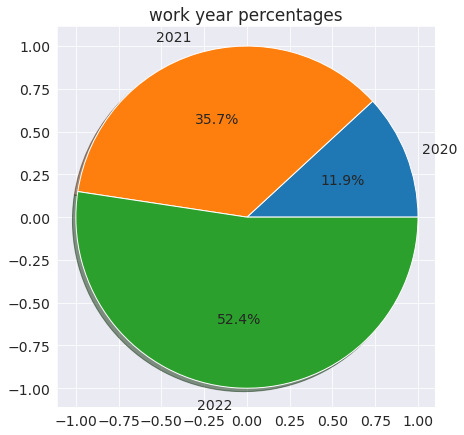

In [17]:
year = np.array(salary_df['work_year'].value_counts(sort=False))

labels = ['2020', '2021', '2022']

plt.figure(figsize=(7,7))
plt.pie(year, labels=labels, autopct='%1.1f%%', shadow=True, frame=True)
plt.title('work year percentages')
plt.show()

The number of job holders employed in data science roles is increasing on a yearly basis, from 2020 to 2022

#### The median salary per year

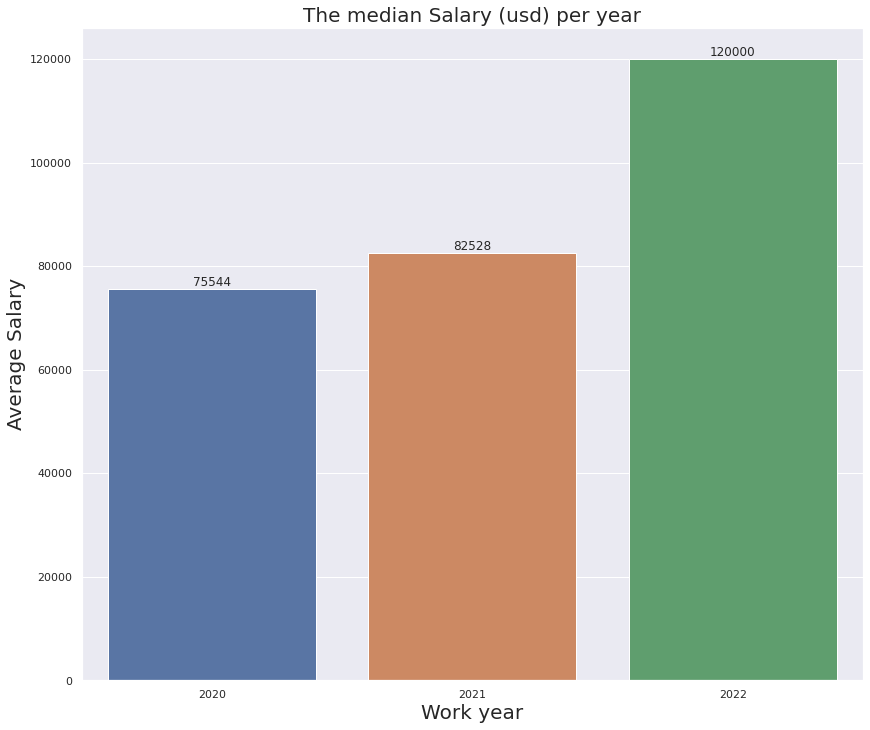

In [18]:
sns.set()
year_salary_usd = salary_df[['work_year', 'salary_in_usd']]
year_salary_usd = year_salary_usd.groupby('work_year').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='work_year',
                y='salary_in_usd',
                data=year_salary_usd,
                ci=None)
g.bar_label(g.containers[0], rotation=0)
plt.ylabel("Average Salary", size=20)
plt.xlabel('Work year', size=20)
plt.xticks(rotation=0)
plt.title("The median Salary (usd) per year", size=20);

From the above diagram, it is evident that the average salary (usd) is increasing on a yearly basis. 2022 being the year with the highest increase in the average salary (usd) from 2021.

### The distribution of job holders at each level of experience

In [19]:
experience = salary_df.experience_level.value_counts()
experience

Senior       280
Middle       213
Entry         88
Executive     26
Name: experience_level, dtype: int64

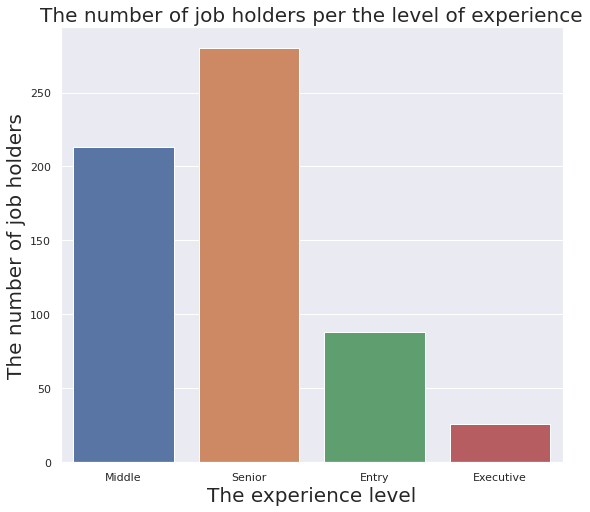

In [20]:
sns.countplot(x ='experience_level', data = salary_df)
plt.xlabel("The experience level", size=20)
plt.ylabel('The number of job holders', size=20)
plt.xticks(rotation=0)
plt.title("The number of job holders per the level of experience", size=20);

A significant number of job holders (280) are at the senior level of employment, while only a few (26) occupy the executive roles.

#### The median salary at each level of experience

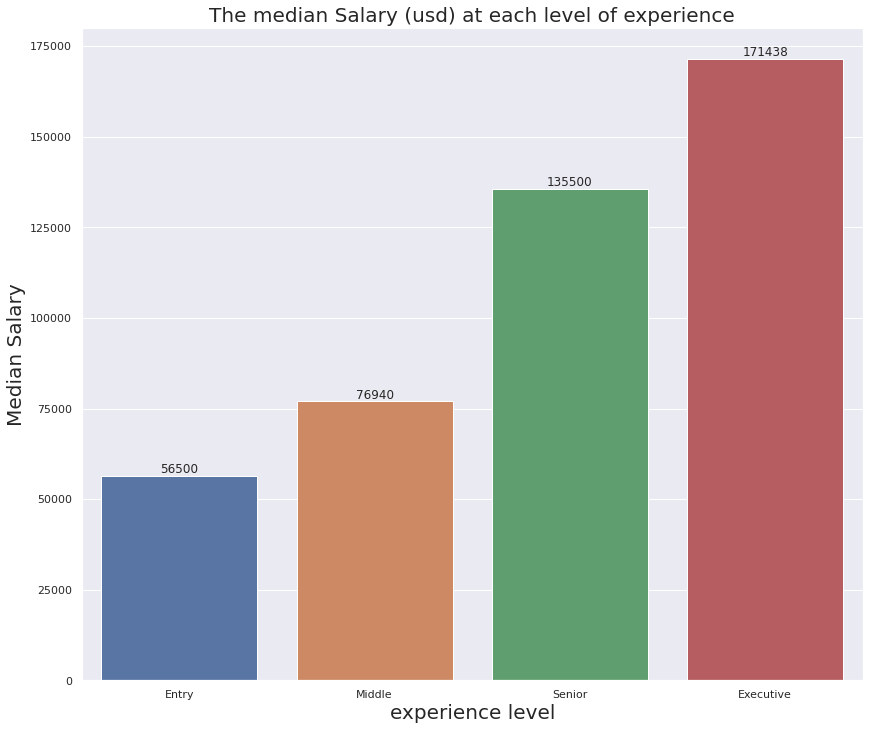

In [21]:
sns.set()
experience_salary_usd = salary_df[['experience_level', 'salary_in_usd']]
experience_salary_usd = experience_salary_usd.groupby('experience_level').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='experience_level',
                y='salary_in_usd',
                data=experience_salary_usd,
                ci=None)
g.bar_label(g.containers[0], rotation=0)
plt.ylabel("Median Salary", size=20)
plt.xlabel('experience level', size=20)
plt.xticks(rotation=0)
plt.title("The median Salary (usd) at each level of experience", size=20);

On average, job holders at the executive and senior level positions receive large sums of money (salary) compared to the ones at the more junior levels.

### The distribution of job holders at each type of employment

In [22]:
employment = salary_df.employment_type.value_counts()
employment

Full-time    588
Part-time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

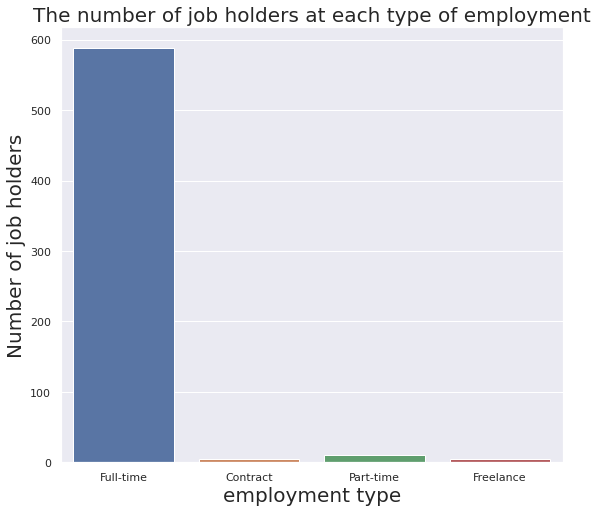

In [23]:
sns.countplot(x ='employment_type', data = salary_df)
plt.ylabel("Number of job holders", size=20)
plt.xlabel('employment type', size=20)
plt.xticks(rotation=0)
plt.title("The number of job holders at each type of employment", size=20);

Most of the job holders are employed on a full-time basis.

#### The median salary at each type of employment

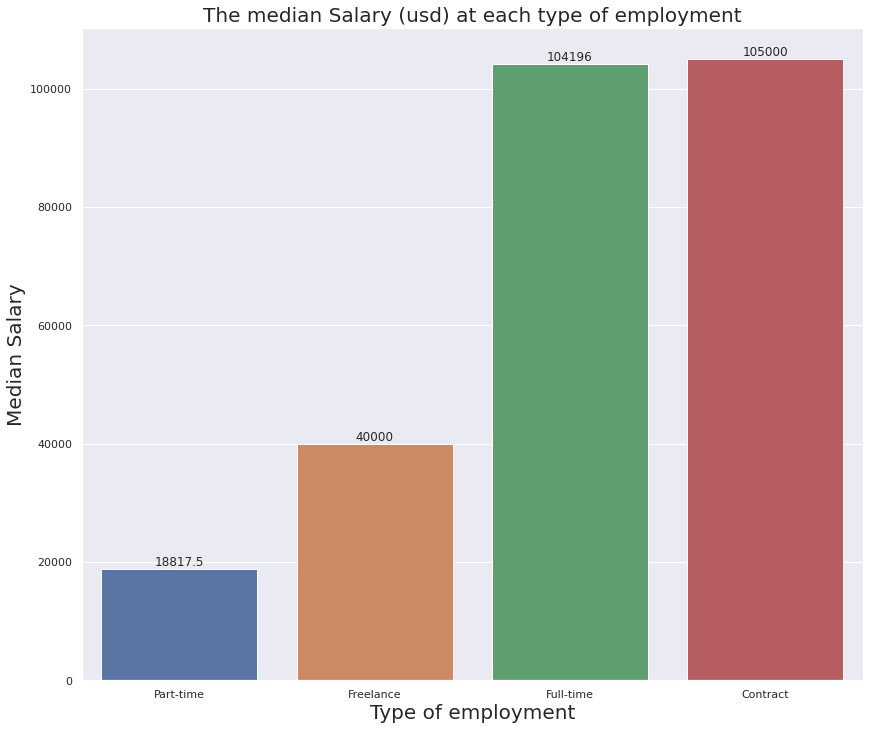

In [24]:
employment_salary_usd = salary_df[['employment_type', 'salary_in_usd']]
employment_salary_usd = employment_salary_usd.groupby('employment_type').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='employment_type',
                y='salary_in_usd',
                data=employment_salary_usd,
                ci=None)
g.bar_label(g.containers[0], rotation=0)
plt.ylabel("Median Salary", size=20)
plt.xlabel('Type of employment', size=20)
plt.xticks(rotation=0)
plt.title("The median Salary (usd) at each type of employment", size=20);

Job holders employed on a contract and full-time basis receive large sums of money (salary) compared to those employed on a part-time and freelance basis.

### The distribution of job holders by the job title

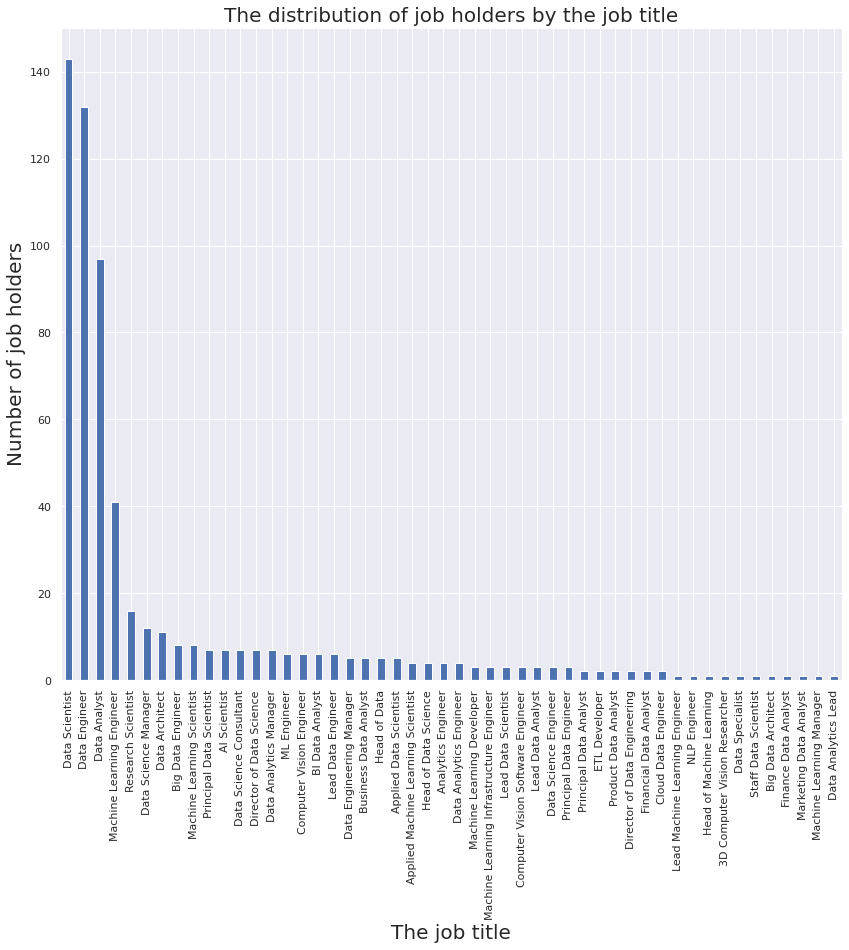

In [25]:
title = salary_df.job_title.value_counts()
title.plot.bar(figsize=(14,12))
plt.ylabel("Number of job holders", size=20)
plt.xlabel('The job title', size=20)
plt.title("The distribution of job holders by the job title", size=20);

From the diagram, we can deduce that a significant number of job holders are data scientists, data engineers, data analysts, and machine learning engineers.

#### The median salary of job holders by the job title

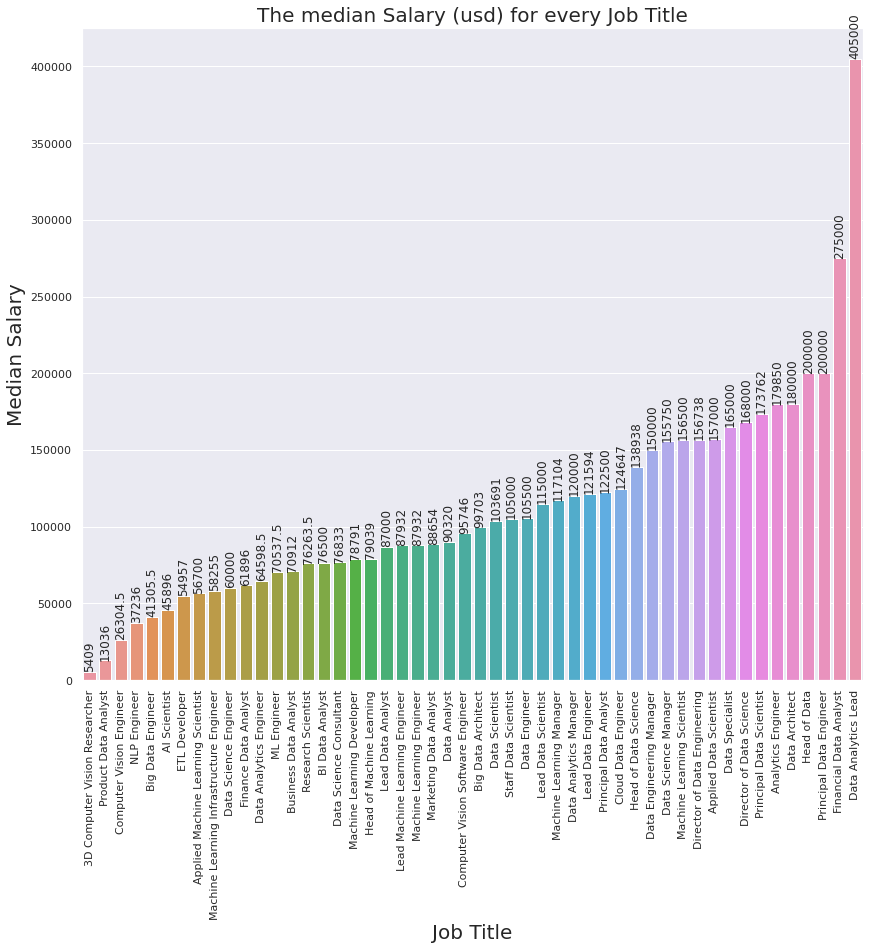

In [26]:
sns.set()
job_salary_usd = salary_df[['job_title', 'salary_in_usd']]
job_salary_usd = job_salary_usd.groupby('job_title').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='job_title',
                y='salary_in_usd',
                data=job_salary_usd,
                ci=None)
g.bar_label(g.containers[0], rotation=90)
plt.ylabel("Median Salary", size=20)
plt.xlabel('Job Title', size=20)
plt.xticks(rotation=90)
plt.title("The median Salary (usd) for every Job Title", size=20);

On average, Data analytics lead are paid the most, followed by Financial data analyst.

### The Distribution of the salary (usd)

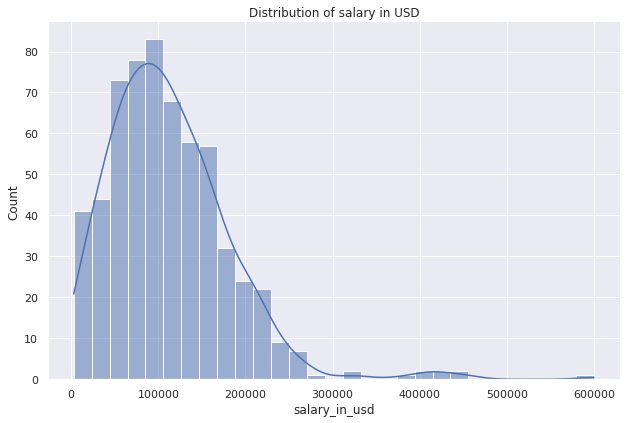

In [27]:
g = sns.displot(x=salary_df['salary_in_usd'], data=salary_df, kde=True)
plt.title('Distribution of salary in USD')
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

From the diagram, we can deduce that a significant number of job holders are under the pay of the range 50,000 t0 150,000, with only a few exceptions(outliers)

### The Distribution job holders per the remote ratio

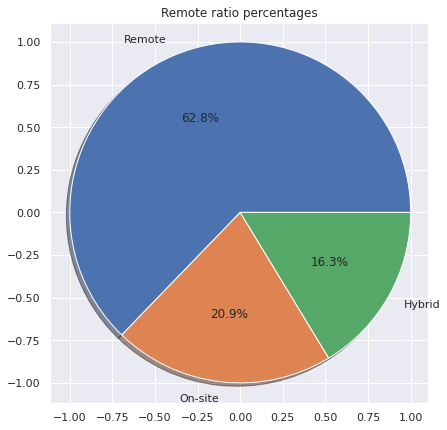

In [28]:
ratio = np.array(salary_df['remote_ratio'].value_counts())

labels = ['Remote', 'On-site', 'Hybrid']

plt.figure(figsize=(7,7))
plt.pie(ratio, labels=labels, autopct='%1.1f%%', shadow=True, frame=True)
plt.title('Remote ratio percentages')
plt.show()

#### The median salary at each remote ratio

In [29]:
salary_df.remote_ratio.value_counts()

Remote     381
On-site    127
Hybrid      99
Name: remote_ratio, dtype: int64

From our dataset, we have a large number of individuals working remotely compared to those working on-site and partially remotely.

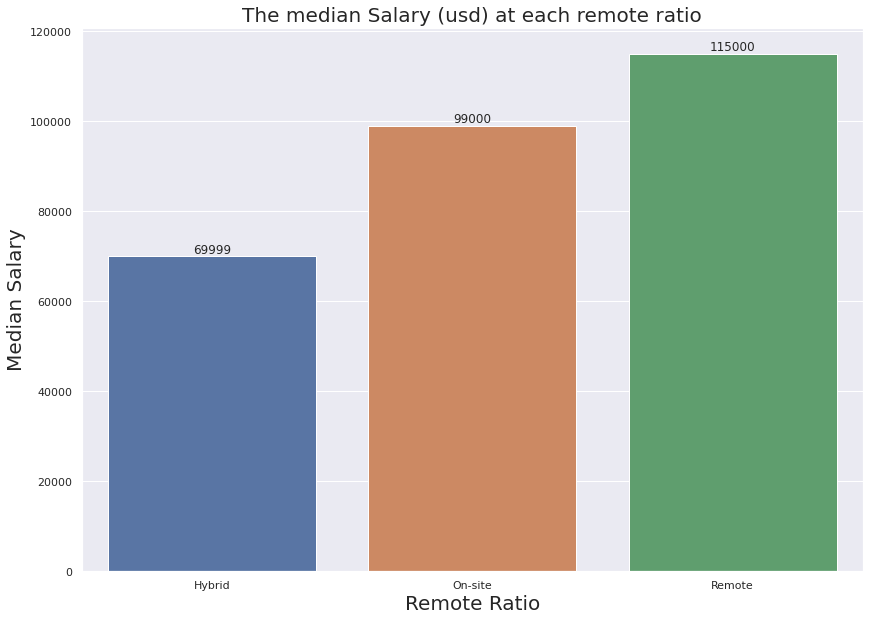

In [30]:
sns.set()
ratio_salary_usd = salary_df[['remote_ratio', 'salary_in_usd']]
ratio_salary_usd = ratio_salary_usd.groupby('remote_ratio').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,10))
g = sns.barplot(x='remote_ratio',
                y='salary_in_usd',
                data=ratio_salary_usd,
                ci=None)
g.bar_label(g.containers[0], rotation=0)
plt.ylabel("Median Salary", size=20)
plt.xlabel('Remote Ratio', size=20)
plt.xticks(rotation=0)
plt.title("The median Salary (usd) at each remote ratio", size=20);

On average, individuals working remotely receive a higher pay, followed by those on-site, and hybrid.

### The Distribution of job holders by the company location

<AxesSubplot:>

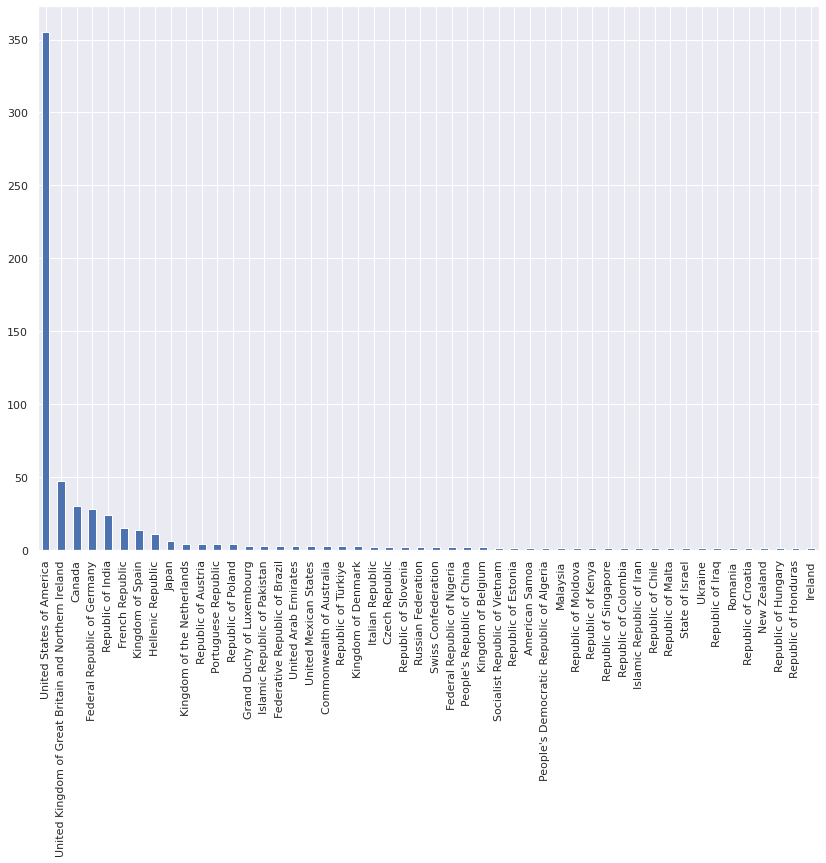

In [31]:
location = salary_df.company_location.value_counts()
location.plot.bar(figsize=(14,10))

USA has the highest number of individuals employed in data science related jobs

#### The median salary of every job title by the company location

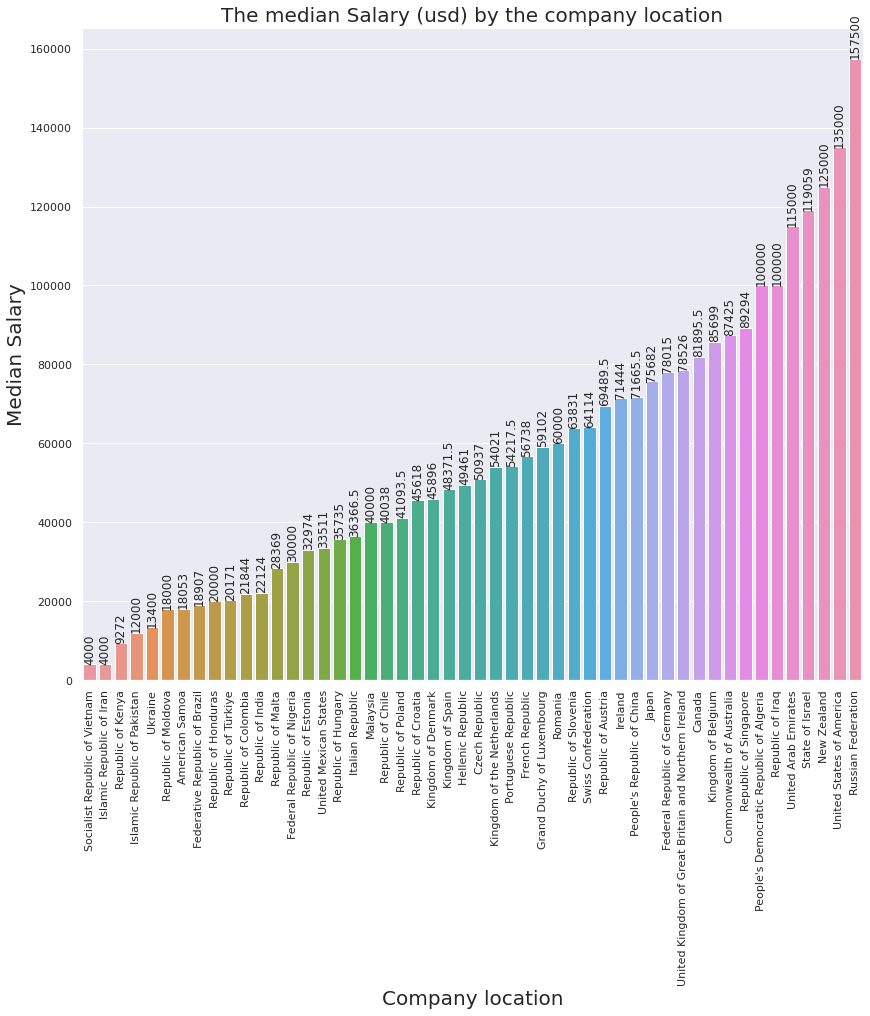

In [32]:
sns.set()
location_salary_usd = salary_df[['company_location', 'salary_in_usd']]
location_salary_usd = location_salary_usd.groupby('company_location').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='company_location',
                y='salary_in_usd',
                data=location_salary_usd,
                ci=None)
g.bar_label(g.containers[0], rotation=90)
plt.ylabel("Median Salary", size=20)
plt.xlabel('Company location', size=20)
plt.xticks(rotation=90)
plt.title("The median Salary (usd) by the company location", size=20);

##### Top 5 countries where data science job holders are paid the most

In [33]:
location_usd = location_salary_usd.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).reset_index().head()
location_usd

,company_location,salary_in_usd
0,Russian Federation,157500.0
1,United States of America,135000.0
2,New Zealand,125000.0
3,State of Israel,119059.0
4,United Arab Emirates,115000.0


##### Top 5 countries where data science job holders are paid the least

In [34]:
location_usd = location_salary_usd.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=True).reset_index().head()
location_usd

,company_location,salary_in_usd
0,Socialist Republic of Vietnam,4000.0
1,Islamic Republic of Iran,4000.0
2,Republic of Kenya,9272.0
3,Islamic Republic of Pakistan,12000.0
4,Ukraine,13400.0


### The Distribution of job holders by the company size

<AxesSubplot:>

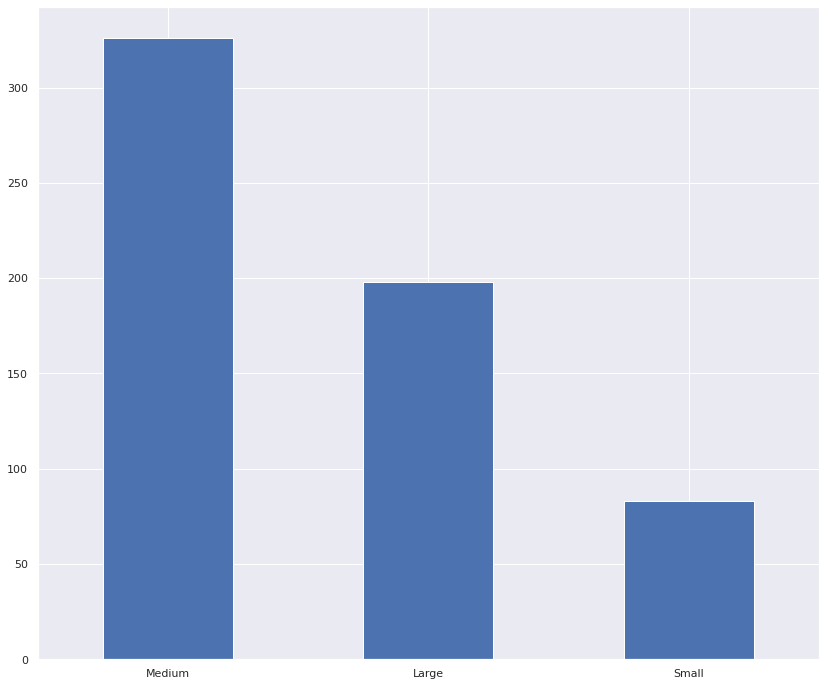

In [35]:
salary_df.company_size.value_counts().plot.bar(figsize=(14,12), rot=0)

A significant number of individuals employed in datascience related roles work in medium sized companies.

#### The median salary at each company size

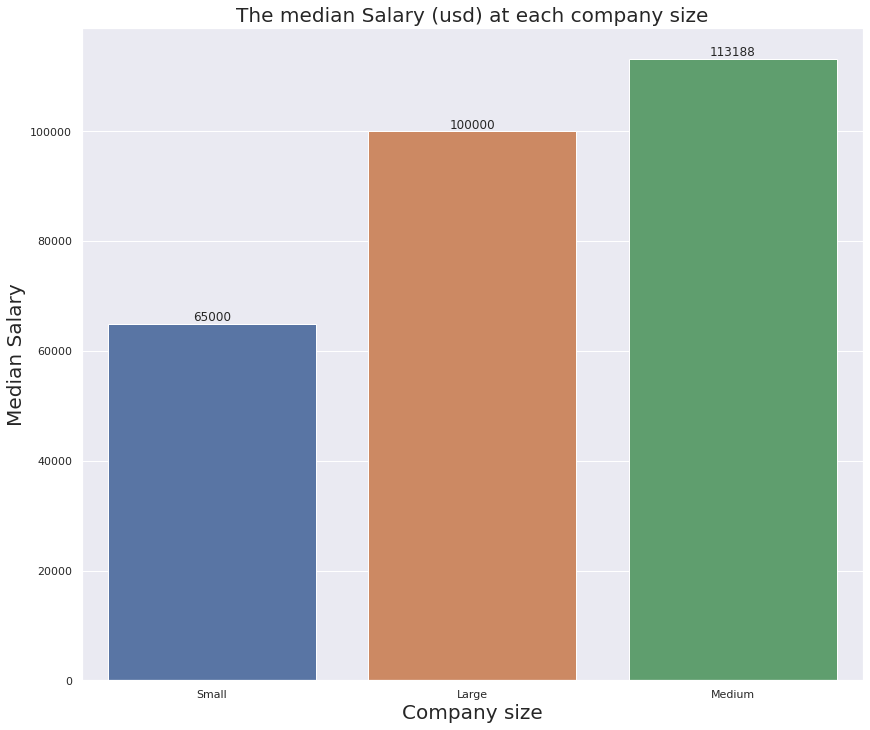

In [36]:
sns.set()
size_salary_usd = salary_df[['company_size', 'salary_in_usd']]
size_salary_usd = size_salary_usd.groupby('company_size').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='company_size',
                y='salary_in_usd',
                data=size_salary_usd,
                ci=None)
g.bar_label(g.containers[0], rotation=0)
plt.ylabel("Median Salary", size=20)
plt.xlabel('Company size', size=20)
plt.xticks(rotation=0)
plt.title("The median Salary (usd) at each company size", size=20);

On average, individuals employed in medium sized companies receive a higher pay followed closely by those employed at large companies.